In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.preprocessing import StandardScaler 
from kneed import KneeLocator
from sklearn.metrics import silhouette_score


In [82]:
data=pd.read_csv(r'c:\Users\HP\Desktop\Online Courses\IBM Machine Learning Engineer\3. Unsupervised ML\project\Country-data.csv')
country_dict=pd.read_csv(r'c:\Users\HP\Desktop\Online Courses\IBM Machine Learning Engineer\3. Unsupervised ML\project\data-dictionary.csv')
country_dict.shape

(10, 2)

In [55]:
#country_dict.to_csv(r"C:\Users\HP\Desktop\country.csv")

# Import Libraries

# Data Exploration and Cleaning

In [83]:
len(data['country'].unique()) #number of countries

167

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [58]:
#missing values
data.isnull().sum() #no missing values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [85]:
def group_variables_types(data):
    numeric_columns = list(data.select_dtypes(include=[np.number]).columns)
    binary_variables=[]
    categorical_variables=[]
    continous_variables=[]
    for i in numeric_columns:
        unique_counts=len(data[i].unique())
        if unique_counts==2:
            binary_variables.append(i)
        elif unique_counts in range(3,10):
            categorical_variables.append(i)
        else:
            continous_variables.append(i)
    print('numeric_variables={}'.format(numeric_columns))
    print('binary_variables= {}'.format(binary_variables))
    print('categorical_variables= {}'.format(categorical_variables))
    print('continous_variables= {}'.format(continous_variables))

In [86]:
group_variables_types(data)

numeric_variables=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
binary_variables= []
categorical_variables= []
continous_variables= ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


In [87]:
numeric_variables=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
binary_variables= []
categorical_variables= []
continous_variables= ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

In [88]:
# Label encoding Country variable

non_numeric_columns = list(data.select_dtypes(exclude=[np.number]).columns)



In [89]:
# country_dummies = pd.get_dummies(data['country'])
# country_dummies

In [90]:
# data=data.join(country_dummies)
# data.colum

In [91]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [92]:
# Correlation Estimate - correlation describes the linear dependency between variables.
data[continous_variables].corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


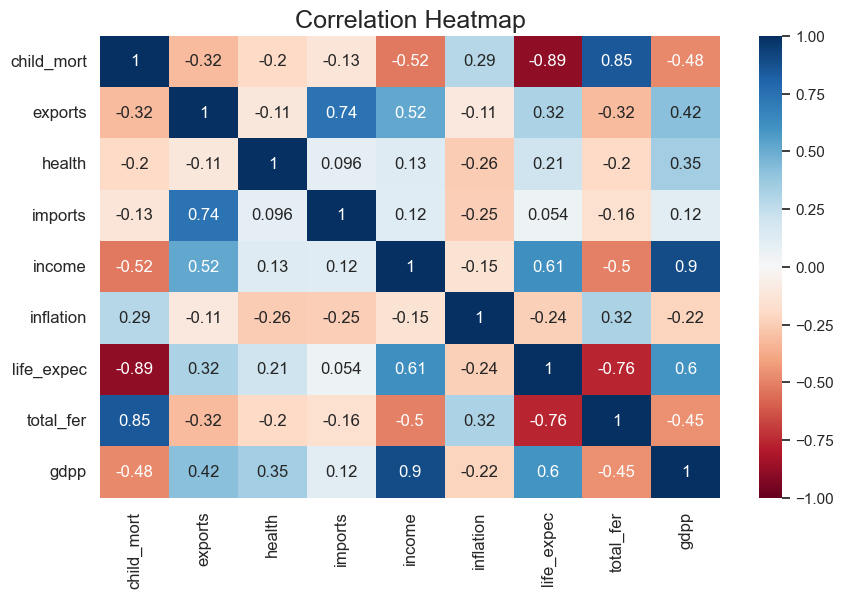

In [93]:
# Correlation in Heatmap form 

plt.figure(figsize=(10,6))
s = sns.heatmap(data[continous_variables].corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax=1)
# different color sets = 'viridis', 'autumn', 'rainbow'
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize =12) 
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize =12) 
plt.title('Correlation Heatmap', fontsize =18)
plt.show()

# Pre-Modeling Data Analysis

## Standardization

In [94]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('country', axis=1))

# K-means Model

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

Text(0.5, 1.0, 'K-means Clustering - Elbow Method')

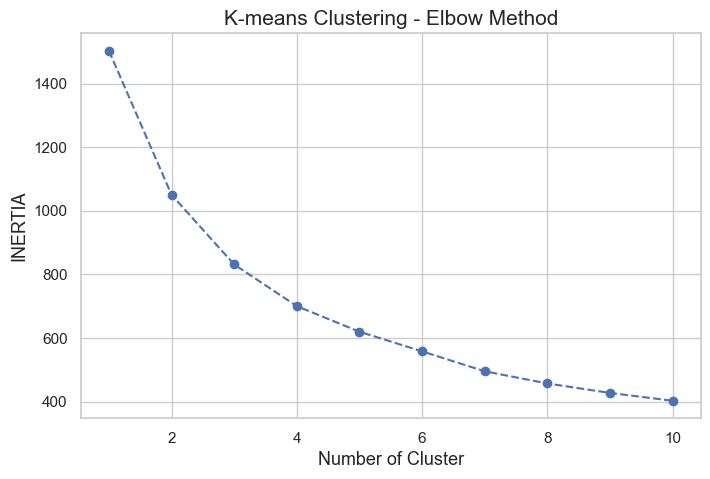

In [95]:
# Optimal number of k
inertia = {}
for i in range(1, 11): 
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state= 42)
    kmeans.fit(data_scaled)
    inertia[i] = kmeans.inertia_
    
# Elbow method
plt.figure(figsize =(8,5))
plt.plot(list(inertia.keys()), list(inertia.values()),  marker = 'o', linestyle = '--' )

plt.xlabel('Number of Cluster', fontsize = 13)
plt.ylabel('INERTIA', fontsize = 13)
plt.title('K-means Clustering - Elbow Method', fontsize = 15)



In [96]:

x, y = list(inertia.keys()), list(inertia.values())
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('The optimal number of clusters, suggested by Elbow criterion: ', kn.knee)

The optimal number of clusters, suggested by Elbow criterion:  4


In [97]:
kmeans =KMeans(n_clusters =4, max_iter = 500,  init = 'k-means++', random_state= 42)
kmeans.fit(data_scaled)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=500, n_clusters=4, random_state=42)

In [98]:
data['KMeans'] = kmeans.labels_

In [99]:

data['KMeans'].replace({0: "A", 1: "B", 2: "C", 3:"D"}, inplace=True)

In [100]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,B
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,C
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,C
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,B
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,C
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,C
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,C
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,C
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,B


In [101]:
kmeans_summary = data.groupby('KMeans')[numeric_variables].mean()
kmeans_summary.sort_values('income')


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
KMeans,,,,,,,,,
B,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
C,21.690588,41.073988,6.197059,47.914893,12671.411765,7.609341,72.871765,2.300706,6519.552941
A,5.181250,46.118750,9.088437,40.584375,44021.875000,2.513844,80.081250,1.788437,42118.750000
D,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [109]:
socio_econ_dict={'B' : 'Very Low',
                 'C' : 'Low',
                 'A' : 'High',
                 'D' : 'Very High'}

In [145]:
kmeans_summary

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
KMeans,,,,,,,,,
A,5.181250,46.118750,9.088437,40.584375,44021.875000,2.513844,80.081250,1.788437,42118.750000
B,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
C,21.690588,41.073988,6.197059,47.914893,12671.411765,7.609341,72.871765,2.300706,6519.552941
D,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [148]:
data['KMeans'].replace(socio_econ_dict, inplace=True)
kmeans_summary = data.groupby('KMeans')[numeric_variables].mean()
kmeans_summary.sort_values('income')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
KMeans,,,,,,,,,
Very Low,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
Low,21.690588,41.073988,6.197059,47.914893,12671.411765,7.609341,72.871765,2.300706,6519.552941
High,5.181250,46.118750,9.088437,40.584375,44021.875000,2.513844,80.081250,1.788437,42118.750000
Very High,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


# Agglomerative Clustering

In [107]:
ag = AgglomerativeClustering(n_clusters=4, linkage='ward', compute_full_tree=True)
ag = ag.fit(data_scaled)
data['agglom'] = ag.fit_predict(data_scaled)
data['agglom'].replace({0: "A", 1: "B", 2: "C", 3:"D"}, inplace=True)
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans,agglom
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Very Low,C
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Low,A
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Low,A
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Very Low,A
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Low,A
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Low,A
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Low,A
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Low,A
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Very Low,A


In [110]:
agglom_summary = data.groupby('agglom')[numeric_variables].mean()
data['agglom'].replace(socio_econ_dict, inplace=True)
agglom_summary.sort_values('income')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
agglom,,,,,,,,,
Low,105.070370,23.589630,6.507037,39.662963,1589.740741,7.142778,57.248148,5.433704,667.888889
High,31.617925,39.990368,6.353679,48.085527,11341.886792,9.120604,70.921698,2.654623,6407.367925
Very Low,6.138710,47.138710,8.666452,38.474194,45996.774194,4.274935,79.841935,1.937742,41777.419355
Very High,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [113]:
data.groupby('KMeans')[numeric_variables].mean().sort_values('income')

## Mean Shift Clustering

In [120]:
meanshift = MeanShift(bandwidth=None)
meanshift.fit(data_scaled)
data['Mean Shift'] = meanshift.labels_
len(data['Mean Shift'].unique())


7

In [125]:
data.groupby('Mean Shift')[numeric_variables].mean().sort_values('income').to_csv(r'C:\Users\HP\Desktop\MeanShift.csv')


In [122]:
socio_econ_dict={1 : 'Very Low',
                 2 : 'Low',
                 0 : 'Moderately Low',
                 4 : 'Average',
                 5 : 'Moderately High',
                 3 : 'High',
                 6 : 'Very High'}

In [123]:
data['Mean Shift'].replace(socio_econ_dict, inplace=True)

In [124]:
data.groupby('Mean Shift')[numeric_variables].mean().sort_values('income')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Mean Shift,,,,,,,,,
Very Low,153.34000,24.020000,7.924000,54.0400,1583.600000,7.040000,47.520000,4.726000,714.800000
Low,130.00000,25.300000,5.070000,17.4000,5150.000000,104.000000,60.500000,5.840000,2330.000000
Moderately Low,35.58366,38.252935,6.844444,44.9403,14831.339869,7.289882,70.877124,2.931895,11149.084967
Average,5.50000,128.000000,8.920000,120.2500,37000.000000,0.305000,80.350000,1.705000,34900.000000
Moderately High,2.80000,200.000000,3.960000,174.0000,72100.000000,-0.046000,82.700000,1.150000,46600.000000
High,8.37500,59.025000,4.190000,27.6750,85775.000000,10.207500,78.950000,2.017500,57975.000000
Very High,2.80000,175.000000,7.770000,142.0000,91700.000000,3.620000,81.300000,1.630000,105000.000000


## Metrics 

In [130]:
kmeans_silhouette = silhouette_score(data_scaled, kmeans.labels_)
agglomerative_silhouette = silhouette_score(data_scaled, ag.labels_)
meanshift_silhouette = silhouette_score(data_scaled, meanshift.labels_)

In [131]:
# Compare silhouette scores
print(f"Silhouette Score for KMeans: {kmeans_silhouette}")
print(f"Silhouette Score for Agglomerative Clustering: {agglomerative_silhouette}")
print(f"Silhouette Score for Mean Shift Clustering: {meanshift_silhouette}")

# Select the model with the highest silhouette score
best_model = max([(kmeans_silhouette, 'KMeans'), (agglomerative_silhouette, 'Agglomerative'), (meanshift_silhouette, 'Mean Shift')])
print(f"Best model based on Silhouette Score: {best_model[1]}")

Silhouette Score for KMeans: 0.29595170577528157
Silhouette Score for Agglomerative Clustering: 0.24811891847692066
Silhouette Score for Mean Shift Clustering: 0.23221570037958442
Best model based on Silhouette Score: KMeans


In [143]:
metrics={'KMeans' : kmeans_silhouette,
       'Agglomerative Clustering' : agglomerative_silhouette,
       'Mean Shift' : meanshift_silhouette}

# Convert the metrics dictionary to a Pandas DataFrame
performance = pd.DataFrame(list(metrics.items()), columns=['Model', 'Silhouette Score'])

performance.to_csv(r'C:\Users\HP\Desktop\performance.csv')

In [163]:
len(list(data[data['KMeans']=='Very Low']['country']))

47

In [152]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'KMeans', 'agglom',
       'DBSCAN', 'Mean Shitf', 'Mean Shift'],
      dtype='object')

In [153]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans,agglom,DBSCAN,Mean Shitf,Mean Shift
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Very Low,Low,0,0,Moderately Low
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Low,High,0,0,Moderately Low
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Low,High,0,0,Moderately Low
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Very Low,High,0,0,Moderately Low
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Low,High,0,0,Moderately Low
